<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>Классификация текстовых данных</b> </div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Ефимов" # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с последующими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>-</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-</b>, вторая неделя и далее до конца модуля <b>-</b>
      </p>
  </div>
</div>

<p><b>Варианты</b></p>

<ol>
    <li>
        Набор электронных сообщений (emails) - <b>спам/не спам</b> - <a href="http://csmining.org/index.php/spam-email-datasets-.html">источник</a> - файл c данными: <b>data/emails.tsv</b>
    </li>
    <li>
        Набор SMS сообщений (sms) - <b>спам/не спам</b> - <a href="https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection">источник</a> - файл c данными: <b>data/SMSSpamCollection</b>
    </li>
    <li>Набор рецензий на фильмы (reviews) - <b>positive/negative</b> - <a href="http://www.cs.cornell.edu/people/pabo/movie-review-data/">источник</a> - файл c данными: <b>data/reviews.tsv</b></li>
</ol>

<p><b>Задача 1.</b> Классификация текстовых сообщений <b><i>(2 балла)</i></b></p>

<ol>
    <li>Загрузите исходные данные</li>
    <li>Разбейте загруженные данные на обучающее (train) и тестовое подможества (test)</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Наивный Байес: модель Бернулли ($\alpha=1$)</li> 
            <li>Наивный Байес: мультиномиальная модель ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации на тестовом подмножестве (Accuracy, R, P, F1)</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_table("data/SMSSpamCollection.tsv", sep='\t', names=["y", "x"])
data = data.replace("ham", 0)
data = data.replace("spam", 1)
y = data.y.values
x = data.x.values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [6]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False) 
vectorizer = vectorizer.fit(x_train)

In [7]:
tfidf_vector_train = vectorizer.transform(x_train)
tfidf_vector_test = vectorizer.transform(x_test)

In [8]:
count_vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,1),
                                   stop_words=None, lowercase=True,
                                   binary=True, strip_accents=None)

In [9]:
train_binary_vectors = count_vectorizer.fit_transform(x_train)
test_binary_vectors = count_vectorizer.transform(x_test)

In [10]:
def FitAndScore(model, train_x, train_y, test_x, test_y):
    fitTime = %timeit -qo model.fit(train_x, train_y)
    predictTime = %timeit -qo model.predict(test_x)
    accuracyScore = accuracy_score(y_true=test_y, y_pred=model.predict(test_x))
    precisionScore = precision_score(y_true=test_y, y_pred=model.predict(test_x))
    recallScore = recall_score(y_true=test_y, y_pred=model.predict(test_x))
    f1Score = f1_score(y_true=test_y, y_pred=model.predict(test_x)) 
    return accuracyScore, precisionScore, recallScore, f1Score, fitTime.average, predictTime.average

def PrintResult(accuracy, precision, recall, f1, fitTime, predictTime, modelName="Безымянная модель"):    
    print (modelName)
    print ("Accuracy:\t" + str(accuracy))
    print ("Precision:\t" + str(precision))
    print ("Recall: \t" + str(recall))
    print ("F-Score:\t" + str(f1))
    print ("Fitness Time:\t" + str(fitTime))
    print ("Predict Time:\t" + str(predictTime))

In [11]:
KNeighborsModel = KNeighborsClassifier(n_neighbors=5)

In [12]:
accuracy, precision, recall, f1, fitTime, predictTime = FitAndScore(KNeighborsModel, tfidf_vector_train, y_train, tfidf_vector_test, y_test)
PrintResult(accuracy, precision, recall, f1, fitTime, predictTime, "К-ближайших соседей")

К-ближайших соседей
Accuracy:	0.9593301435406698
Precision:	1.0
Recall: 	0.7043478260869566
F-Score:	0.826530612244898
Fitness Time:	0.0005181951571428572
Predict Time:	0.21974401428571408


In [13]:
LogisticRegressionModel = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)

In [14]:
accuracy, precision, recall, f1, fitTime, predictTime = FitAndScore(LogisticRegressionModel, tfidf_vector_train, y_train, tfidf_vector_test, y_test)
PrintResult(accuracy, precision, recall, f1, fitTime, predictTime, "Логистическая регрессия")

Логистическая регрессия
Accuracy:	0.9683014354066986
Precision:	0.988950276243094
Recall: 	0.7782608695652173
F-Score:	0.8710462287104623
Fitness Time:	0.05050965571428568
Predict Time:	0.00013649848000000007


In [15]:
BernoulliModel = BernoulliNB(alpha=1, binarize=None)

In [16]:
accuracy, precision, recall, f1, fitTime, predictTime = FitAndScore(BernoulliModel, train_binary_vectors, y_train, test_binary_vectors, y_test)
PrintResult(accuracy, precision, recall, f1, fitTime, predictTime, "Наивный Байес: модель Бернулли")

Наивный Байес: модель Бернулли
Accuracy:	0.9808612440191388
Precision:	0.995
Recall: 	0.8652173913043478
F-Score:	0.9255813953488372
Fitness Time:	0.0013420121714285728
Predict Time:	0.0005436731999999996


In [17]:
MultinomialModel = MultinomialNB(alpha=1)

In [18]:
accuracy, precision, recall, f1, fitTime, predictTime = FitAndScore(MultinomialModel, tfidf_vector_train, y_train, tfidf_vector_test, y_test)
PrintResult(accuracy, precision, recall, f1, fitTime, predictTime, "Наивный Байес: Мультиномиальная модель")

Наивный Байес: Мультиномиальная модель
Accuracy:	0.9569377990430622
Precision:	1.0
Recall: 	0.6869565217391305
F-Score:	0.8144329896907216
Fitness Time:	0.001486250971428572
Predict Time:	0.00025938295714285836


<p><b>Задача 2.</b> Применение k-folds <b><i>(3 балла)</i></b></p>

<p>Повторите решение задачи 1, но с ипользованием k-folds (k=4) для разделения исходных данных, обучения и тестирования.</p>

In [19]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False) 
vectorizer = vectorizer.fit(x)

In [20]:
tfidf_vector = vectorizer.transform(x)

In [21]:
count_vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,1),
                                   stop_words=None, lowercase=True,
                                   binary=True, strip_accents=None)

In [22]:
binary_vectors = count_vectorizer.fit_transform(x)

In [23]:
def FitAndScoreCV(model, x, y, splits):
    
    n_splits = 0
    fitTime = 0
    predictTime = 0
    accuracyScore = 0
    precisionScore = 0
    recallScore = 0
    f1Score = 0
    
    for train, test in splits:
        n_splits += 1
        tempModel = model
        tempFitTime = %timeit -qo model.fit(x[train], y[train])
        fitTime += tempFitTime.average
        tempPredictTime = %timeit -qo model.predict(x[test])
        predictTime += tempPredictTime.average
        accuracyScore += accuracy_score(y_true=y[test], y_pred=model.predict(x[test]))
        precisionScore += precision_score(y_true=y[test], y_pred=model.predict(x[test]))
        recallScore += recall_score(y_true=y[test], y_pred=model.predict(x[test]))
        f1Score += f1_score(y_true=y[test], y_pred=model.predict(x[test])) 
        
    return accuracyScore/n_splits, precisionScore/n_splits, recallScore/n_splits, f1Score/n_splits, fitTime/n_splits, predictTime/n_splits

In [24]:
n_splits = 4
kf = KFold(n_splits=n_splits, shuffle=True, random_state=123)

In [25]:
KNeighborsModel = KNeighborsClassifier(n_neighbors=5)

In [26]:
splits = kf.split(tfidf_vector, y)
accuracy, precision, recall, f1, fitTime, predictTime = FitAndScoreCV(KNeighborsModel, tfidf_vector, y, splits)
PrintResult(accuracy, precision, recall, f1, fitTime, predictTime, "К-ближайших соседей")

К-ближайших соседей
Accuracy:	0.9204953338119167
Precision:	0.9981060606060606
Recall: 	0.4071745296269753
F-Score:	0.5605642996612404
Fitness Time:	0.0008489159107142865
Predict Time:	0.19575693250000006


In [27]:
LogisticRegressionModel = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)

In [28]:
splits = kf.split(tfidf_vector, y)
accuracy, precision, recall, f1, fitTime, predictTime = FitAndScoreCV(LogisticRegressionModel, tfidf_vector, y, splits)
PrintResult(accuracy, precision, recall, f1, fitTime, predictTime, "Логистическая модель")

Логистическая модель
Accuracy:	0.9605168700646087
Precision:	0.9907945546378714
Recall: 	0.7123036610129001
F-Score:	0.8282647534427598
Fitness Time:	0.05410923321428567
Predict Time:	0.00034486265357142846


In [29]:
BernoulliModel = BernoulliNB(alpha=1, binarize=None)

In [30]:
splits = kf.split(tfidf_vector, y)
accuracy, precision, recall, f1, fitTime, predictTime = FitAndScoreCV(BernoulliModel, binary_vectors, y, splits)
PrintResult(accuracy, precision, recall, f1, fitTime, predictTime, "Наивный Байес: модель Бернулли")

Наивный Байес: модель Бернулли
Accuracy:	0.9804379038047379
Precision:	0.9833905302185741
Recall: 	0.8690100157491462
F-Score:	0.9223851079859368
Fitness Time:	0.001758523364285718
Predict Time:	0.0008101698357142816


In [31]:
MultinomialModel = MultinomialNB(alpha=1)

In [32]:
splits = kf.split(tfidf_vector, y)
accuracy, precision, recall, f1, fitTime, predictTime = FitAndScoreCV(MultinomialModel, tfidf_vector, y, splits)
PrintResult(accuracy, precision, recall, f1, fitTime, predictTime, "Наивный Байес: Мультиномиальная модель")

Наивный Байес: Мультиномиальная модель
Accuracy:	0.9592605886575736
Precision:	1.0
Recall: 	0.6964989393657872
F-Score:	0.8206308015857745
Fitness Time:	0.0018907759642857148
Predict Time:	0.0004392736607142861


<p><b>Задача 3.</b> Выбор модели <b><i>(5 баллов)</i></b></p>

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами: </p>

In [33]:
ns = np.arange(1, 150, 20)  # количество соседей

In [34]:
KNeighborsModel = KNeighborsClassifier()

In [35]:
KNeighborsModel_grid = GridSearchCV(KNeighborsModel, {"n_neighbors":ns}, cv=4, return_train_score=True)

In [36]:
def FitAndScoreGrid(model, params, n_splits, x_train, y_train, x_test, y_test, n_gram=(1,1), isBinary=False):
    if isBinary:
        vectorizer = CountVectorizer(analyzer="word", ngram_range=n_gram, stop_words=None, lowercase=True, binary=True, strip_accents=None)
        train_vectors = vectorizer.fit_transform(x_train)
        test_vectors = vectorizer.transform(x_test)
    else:
        vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, use_idf=True, ngram_range=n_gram, smooth_idf=False) 
        vectorizer = vectorizer.fit(x_train)
        train_vectors = vectorizer.transform(x_train)
        test_vectors = vectorizer.transform(x_test)
    
    model_grid = GridSearchCV(model, params, cv=n_splits, return_train_score=True)
    model_grid.fit(train_vectors, y_train)
    best_index = model_grid.best_index_
    best_model = model_grid.best_estimator_
    best_param = model_grid.best_params_
    mean_train_score = model_grid.cv_results_["mean_train_score"]
    mean_test_score = model_grid.cv_results_["mean_test_score"]
    best_fitTime = model_grid.cv_results_["mean_fit_time"][best_index]
    best_predictTime = %timeit -qo best_model.predict(test_vectors)
    accuracy = accuracy_score(y_true=y_test, y_pred=best_model.predict(test_vectors))
    
    return best_param, mean_train_score, mean_test_score, accuracy, best_fitTime, best_predictTime.average

In [37]:
KNeighborsModel_param_1, mean_train_score_1, mean_test_score_1, KNeighborsModel_accuracy_1, KNeighborsModel_fitTime_1, KNeighborsModel_predictTime_1 =FitAndScoreGrid(KNeighborsModel, {"n_neighbors":ns}, n_splits, x_train, y_train, x_test, y_test, (1,1))

KNeighborsModel_param_2, mean_train_score_2, mean_test_score_2, KNeighborsModel_accuracy_2, KNeighborsModel_fitTime_2, KNeighborsModel_predictTime_2 = FitAndScoreGrid(KNeighborsModel, {"n_neighbors":ns}, n_splits, x_train, y_train, x_test, y_test, (2,2))

KNeighborsModel_param_12, mean_train_score_12, mean_test_score_12, KNeighborsModel_accuracy_12, KNeighborsModel_fitTime_12, KNeighborsModel_predictTime_12 = FitAndScoreGrid(KNeighborsModel, {"n_neighbors":ns}, n_splits, x_train, y_train, x_test, y_test, (1,2))

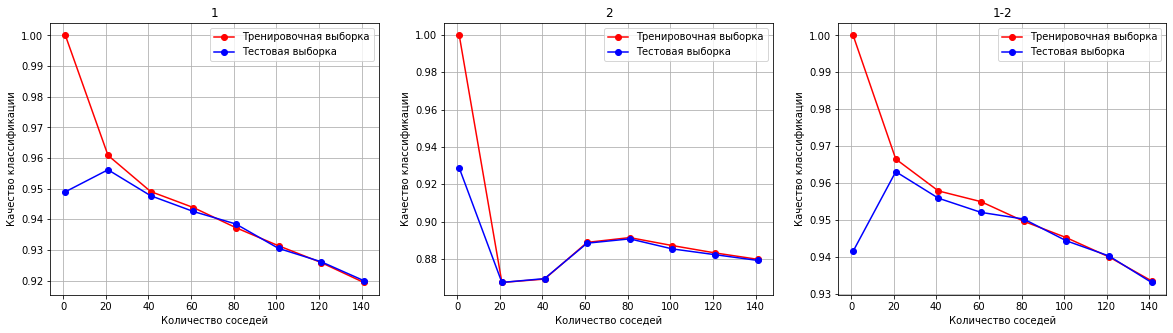

In [38]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.title("1")
plt.xlabel("Количество соседей")
plt.ylabel("Качество классификации")
plt.plot(ns, mean_train_score_1, "r-o", label = 'Тренировочная выборка')
plt.plot(ns, mean_test_score_1,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

plt.subplot(1,3,2)
plt.title("2")
plt.xlabel("Количество соседей")
plt.ylabel("Качество классификации")
plt.plot(ns, mean_train_score_2, "r-o", label = 'Тренировочная выборка')
plt.plot(ns, mean_test_score_2,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

plt.subplot(1,3,3)
plt.title("1-2")
plt.xlabel("Количество соседей")
plt.ylabel("Качество классификации")
plt.plot(ns, mean_train_score_12, "r-o", label = 'Тренировочная выборка')
plt.plot(ns, mean_test_score_12,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

In [39]:
cs = np.logspace(-2, 10, 8, base=10)  # параметр регуляризации

In [40]:
LogisticRegressionModel = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=1000, solver="lbfgs", random_state=12345)

In [41]:
LogisticRegressionModel_param_1, mean_train_score_1, mean_test_score_1, LogisticRegressionModel_accuracy_1, LogisticRegressionModel_fitTime_1, LogisticRegressionModel_predictTime_1 =FitAndScoreGrid(LogisticRegressionModel, {"C":cs}, n_splits, x_train, y_train, x_test, y_test, (1,1))

LogisticRegressionModel_param_2, mean_train_score_2, mean_test_score_2, LogisticRegressionModel_accuracy_2, LogisticRegressionModel_fitTime_2, LogisticRegressionModel_predictTime_2 = FitAndScoreGrid(LogisticRegressionModel, {"C":cs}, n_splits, x_train, y_train, x_test, y_test, (2,2))

LogisticRegressionModel_param_12, mean_train_score_12, mean_test_score_12, LogisticRegressionModel_accuracy_12, LogisticRegressionModel_fitTime_12, LogisticRegressionModel_predictTime_12 = FitAndScoreGrid(LogisticRegressionModel, {"C":cs}, n_splits, x_train, y_train, x_test, y_test, (1,2))

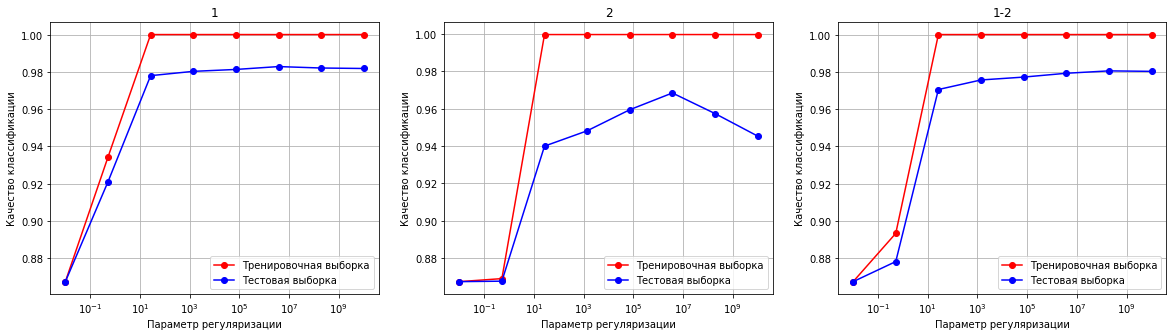

In [42]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.title("1")
plt.xscale('log')
plt.xlabel("Параметр регуляризации")
plt.ylabel("Качество классификации")
plt.plot(cs, mean_train_score_1, "r-o", label = 'Тренировочная выборка')
plt.plot(cs, mean_test_score_1,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

plt.subplot(1,3,2)
plt.title("2")
plt.xscale('log')
plt.xlabel("Параметр регуляризации")
plt.ylabel("Качество классификации")
plt.plot(cs, mean_train_score_2, "r-o", label = 'Тренировочная выборка')
plt.plot(cs, mean_test_score_2,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

plt.subplot(1,3,3)
plt.title("1-2")
plt.xscale('log')
plt.xlabel("Параметр регуляризации")
plt.ylabel("Качество классификации")
plt.plot(cs, mean_train_score_12, "r-o", label = 'Тренировочная выборка')
plt.plot(cs, mean_test_score_12,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

In [43]:
alphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр

In [44]:
BernoulliModel = BernoulliNB(binarize=None)

In [45]:
BernoulliModel_param_1, mean_train_score_1, mean_test_score_1, BernoulliModel_accuracy_1, BernoulliModel_fitTime_1, BernoulliModel_predictTime_1 =FitAndScoreGrid(BernoulliModel, {"alpha":alphas}, n_splits, x_train, y_train, x_test, y_test, (1,1), True)

BernoulliModel_param_2, mean_train_score_2, mean_test_score_2, BernoulliModel_accuracy_2, BernoulliModel_fitTime_2, BernoulliModel_predictTime_2 = FitAndScoreGrid(BernoulliModel, {"alpha":alphas}, n_splits, x_train, y_train, x_test, y_test, (2,2), True)

BernoulliModel_param_12, mean_train_score_12, mean_test_score_12, BernoulliModel_accuracy_12, BernoulliModel_fitTime_12, BernoulliModel_predictTime_12 = FitAndScoreGrid(BernoulliModel, {"alpha":alphas}, n_splits, x_train, y_train, x_test, y_test, (1,2), True)

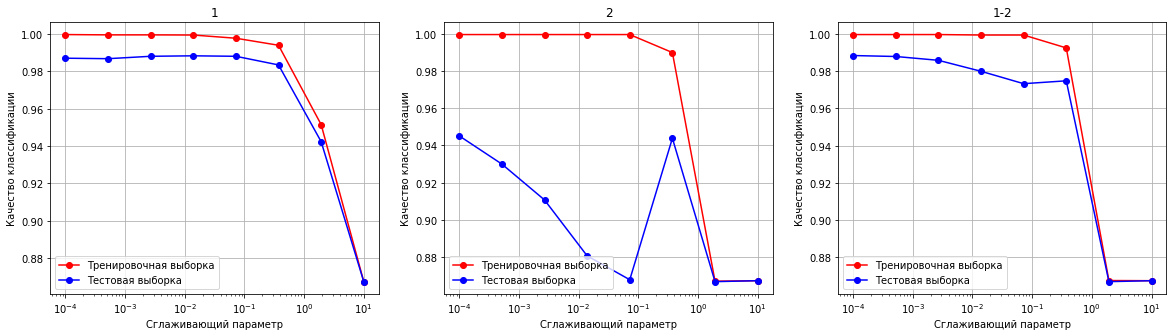

In [46]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.title("1")
plt.xscale('log')
plt.xlabel("Сглаживающий параметр")
plt.ylabel("Качество классификации")
plt.plot(alphas, mean_train_score_1, "r-o", label = 'Тренировочная выборка')
plt.plot(alphas, mean_test_score_1,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

plt.subplot(1,3,2)
plt.title("2")
plt.xscale('log')
plt.xlabel("Сглаживающий параметр")
plt.ylabel("Качество классификации")
plt.plot(alphas, mean_train_score_2, "r-o", label = 'Тренировочная выборка')
plt.plot(alphas, mean_test_score_2,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

plt.subplot(1,3,3)
plt.title("1-2")
plt.xscale('log')
plt.xlabel("Сглаживающий параметр")
plt.ylabel("Качество классификации")
plt.plot(alphas, mean_train_score_12, "r-o", label = 'Тренировочная выборка')
plt.plot(alphas, mean_test_score_12,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

In [47]:
alphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр

In [48]:
MultinomialModel = MultinomialNB()

In [49]:
MultinomialModel_param_1, mean_train_score_1, mean_test_score_1, MultinomialModel_accuracy_1, MultinomialModel_fitTime_1, MultinomialModel_predictTime_1 =FitAndScoreGrid(MultinomialModel, {"alpha":alphas}, n_splits, x_train, y_train, x_test, y_test, (1,1))

MultinomialModel_param_2, mean_train_score_2, mean_test_score_2, MultinomialModel_accuracy_2, MultinomialModel_fitTime_2, MultinomialModel_predictTime_2 = FitAndScoreGrid(MultinomialModel, {"alpha":alphas}, n_splits, x_train, y_train, x_test, y_test, (2,2))

MultinomialModel_param_12, mean_train_score_12, mean_test_score_12, MultinomialModel_accuracy_12, MultinomialModel_fitTime_12, MultinomialModel_predictTime_12 = FitAndScoreGrid(MultinomialModel, {"alpha":alphas}, n_splits, x_train, y_train, x_test, y_test, (1,2))

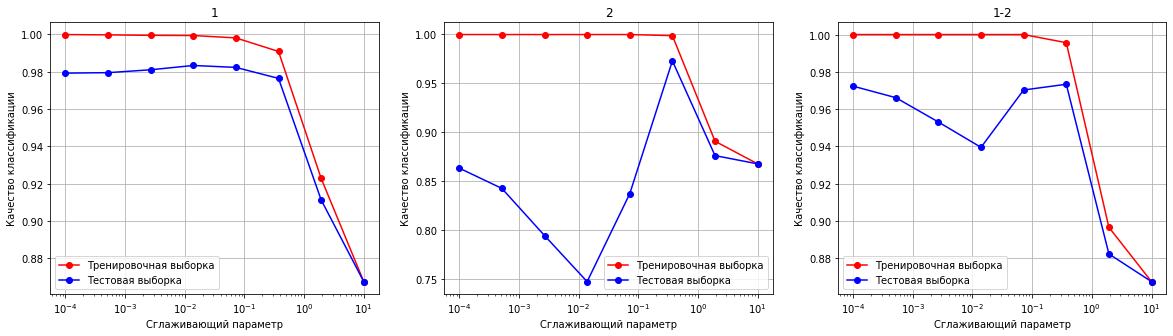

In [50]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.title("1")
plt.xscale('log')
plt.xlabel("Сглаживающий параметр")
plt.ylabel("Качество классификации")
plt.plot(alphas, mean_train_score_1, "r-o", label = 'Тренировочная выборка')
plt.plot(alphas, mean_test_score_1,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

plt.subplot(1,3,2)
plt.title("2")
plt.xscale('log')
plt.xlabel("Сглаживающий параметр")
plt.ylabel("Качество классификации")
plt.plot(alphas, mean_train_score_2, "r-o", label = 'Тренировочная выборка')
plt.plot(alphas, mean_test_score_2,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

plt.subplot(1,3,3)
plt.title("1-2")
plt.xscale('log')
plt.xlabel("Сглаживающий параметр")
plt.ylabel("Качество классификации")
plt.plot(alphas, mean_train_score_12, "r-o", label = 'Тренировочная выборка')
plt.plot(alphas, mean_test_score_12,"b-o", label = 'Тестовая выборка')
plt.legend()
plt.grid(True)

In [51]:
tableData = [
    ["К-ближайших соседей", "1-1", KNeighborsModel_param_1, KNeighborsModel_fitTime_1, KNeighborsModel_predictTime_1, KNeighborsModel_accuracy_1],
    ["К-ближайших соседей", "2-2", KNeighborsModel_param_2, KNeighborsModel_fitTime_2, KNeighborsModel_predictTime_2, KNeighborsModel_accuracy_2],
    ["К-ближайших соседей", "1-2", KNeighborsModel_param_12, KNeighborsModel_fitTime_12, KNeighborsModel_predictTime_12, KNeighborsModel_accuracy_12],
    
    ["Логистическая регрессия", "1-1", LogisticRegressionModel_param_1, LogisticRegressionModel_fitTime_1, LogisticRegressionModel_predictTime_1, LogisticRegressionModel_accuracy_1],
    ["Логистическая регрессия", "2-2", LogisticRegressionModel_param_2, LogisticRegressionModel_fitTime_2, LogisticRegressionModel_predictTime_2, LogisticRegressionModel_accuracy_2],
    ["Логистическая регрессия", "1-2", LogisticRegressionModel_param_12, LogisticRegressionModel_fitTime_12, LogisticRegressionModel_predictTime_12, LogisticRegressionModel_accuracy_12],
    
    ["Наивный Байес: модель Бернулли", "1-1", BernoulliModel_param_1, BernoulliModel_fitTime_1, BernoulliModel_predictTime_1, BernoulliModel_accuracy_1],
    ["Наивный Байес: модель Бернулли", "2-2", BernoulliModel_param_2, BernoulliModel_fitTime_2, BernoulliModel_predictTime_2, BernoulliModel_accuracy_2],
    ["Наивный Байес: модель Бернулли", "1-2", BernoulliModel_param_12, BernoulliModel_fitTime_12, BernoulliModel_predictTime_12, BernoulliModel_accuracy_12],
    
    ["Наивный Байес: Мультиномиальная модель", "1-1", MultinomialModel_param_1, MultinomialModel_fitTime_1, MultinomialModel_predictTime_1, MultinomialModel_accuracy_1],
    ["Наивный Байес: Мультиномиальная модель", "2-2", MultinomialModel_param_2, MultinomialModel_fitTime_2, MultinomialModel_predictTime_2, MultinomialModel_accuracy_2],
    ["Наивный Байес: Мультиномиальная модель", "1-2", MultinomialModel_param_12, MultinomialModel_fitTime_12, MultinomialModel_predictTime_12, MultinomialModel_accuracy_12],
]

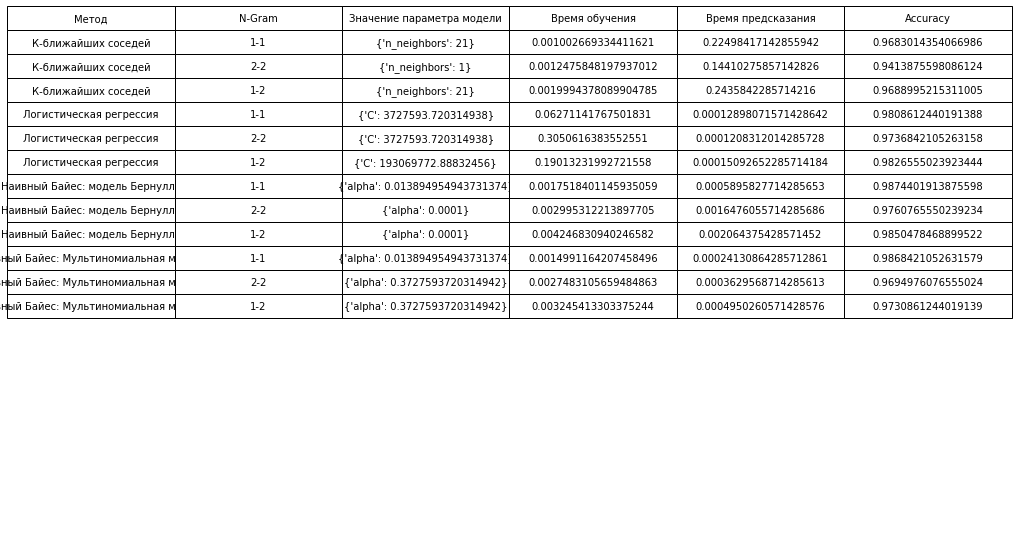

In [52]:
plt.axis('off')
table = plt.table(cellText=tableData, loc="top", colLabels=["Метод", "N-Gram","Значение параметра модели","Время обучения","Время предсказания","Accuracy"], cellLoc="center" )
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(xscale=3, yscale=2)
plt.show()

Выводы:
1. Все методы примерно одинаково точные, однако метод К-ближайших соседей немного уступает другим.
2. По времени можно выделить 2 модели:
    2.1. По времени обучения метод Логистической регрессии работает дольше всех.
    2.2. По времени предсказания метод К-ближайших соседей работает дольше всех.
3. Если судить по графикам, то по N-Gram можно сделать следующие выводы:
    3.1. Значения 1-1 и 1-2 имеют примерно одинаковые графики, слабо отличающиеся друг от друга.
    3.2. Значение 2-2 имеет явные недостатки в результатах, в большинстве случаев. 

<p><b>Задача 4. (опционально)</b> Исследование влияния количества признаков FeatureHasher на качество классификации <b><i>(5 баллов к сумме по всем ДЗ)</i></b></p>

<p>Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [53]:
n_features = np.logspace(1, 5, 5, base=10)  # количество признаков
non_negative=True

<p>Можно воспользоваться GridSearchCV</p>